# 1. Introduction

# 1. Introduction

Heart disease is the leading cause of mortality globally, accounting for 31% of all deaths annually. Early detection plays a crucial role in reducing its impact. This project leverages machine learning algorithms to predict heart disease based on patient data, enabling early intervention and improved healthcare outcomes.

**Dataset Overview:**
- **Source:** Heart Failure Prediction Dataset (Kaggle).
- **Size:** 918 rows, 12 columns.
- **Features:** Patient information such as age, cholesterol, max heart rate, and ECG data.
- **Target:** `HeartDisease` (binary: 0 = No, 1 = Yes).

**Objective:**
- Explore and preprocess the dataset.
- Engineer features to improve model performance.
- Implement and evaluate various machine learning models.
- Provide insights and recommendations based on the analysis.

**Significance:**
The study highlights how machine learning models can aid healthcare professionals in making data-driven decisions, potentially saving lives and reducing healthcare costs.


# 2. Data Loading and Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nFirst Few Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (918, 12)

Columns:
 ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

First Few Rows:
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [51]:
# Dataset summary
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Feature summary (manually created if not present in the dataset metadata)
feature_summary = {
    "Feature": ["Age", "Sex", "Cholesterol", "RestingBP", "MaxHR"],
    "Description": [
        "Age of the patient",
        "Gender of the patient",
        "Cholesterol level (mg/dL)",
        "Resting blood pressure (mmHg)",
        "Maximum heart rate achieved during exercise"
    ],
    "Type": ["Numeric", "Categorical", "Numeric", "Numeric", "Numeric"],
    "Range or Unique Values": ["29-77", "Male, Female", "120-564", "90-200", "71-202"]
}
import pandas as pd
feature_df = pd.DataFrame(feature_summary)
print(feature_df)


Dataset Shape: (918, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 86.2 KB
None

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR

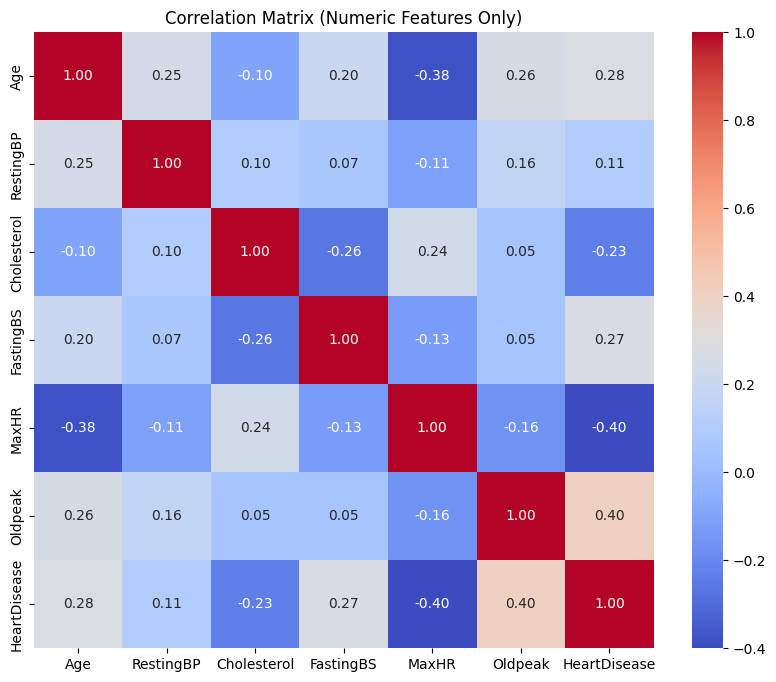

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

Analysis: From this correlation matrix, we can see the correlation of the features in the dataset with each other, and most importantly their correlation with heart disease. Age and Fasting blood sugar appear to have a small to moderate correlation with heart disease, with cholesterol having a small to moderate inverse correlation. We could say this represents that a higher age and fasting blood pressure could indicate a higher likelihood of heart disease. Resting blood pressure seems to have the smallest correlation with heart disease among these features. The highest correlations are seen with max heart rate and oldpeak. Max heart rate has a high negative correlation with heart disease, meaning a lower maximum heart rate can very likely indicate an increased risk of heart disease. Oldpeak has a high correlation with heart disease, which follows as oldpeak measures the depression between the first and second parts of an ST segment in an ECG, which can indicate reduced blood flow to the heart. 

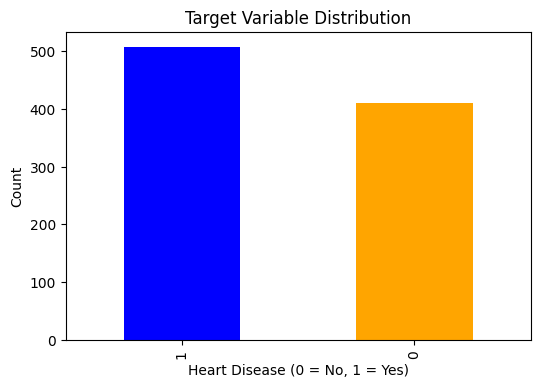

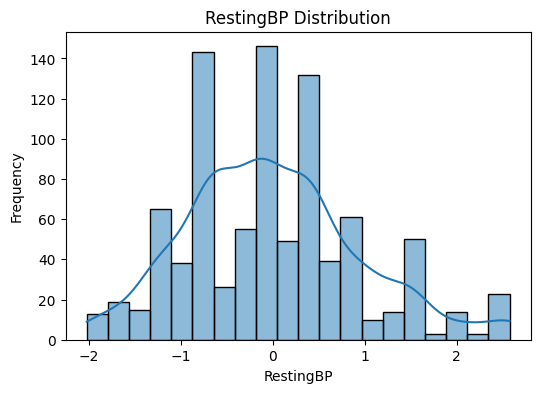

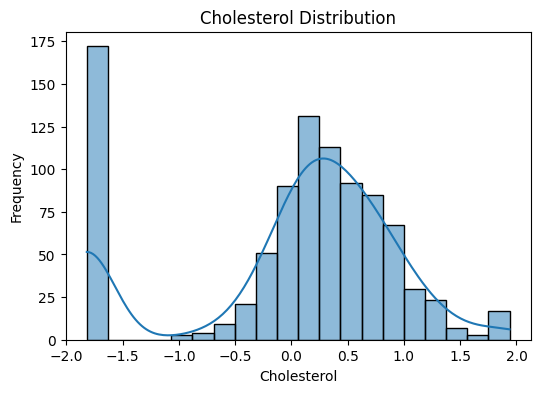

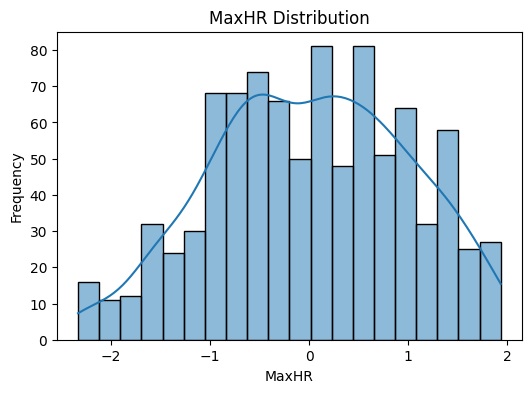

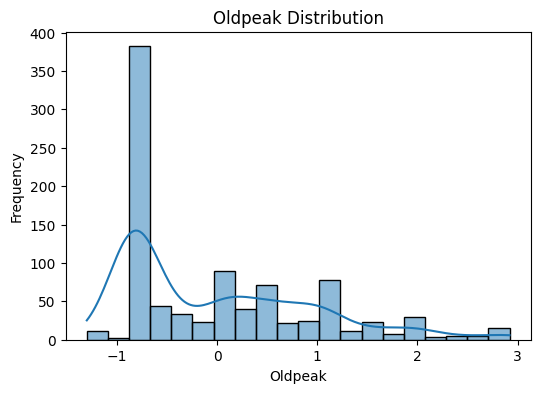

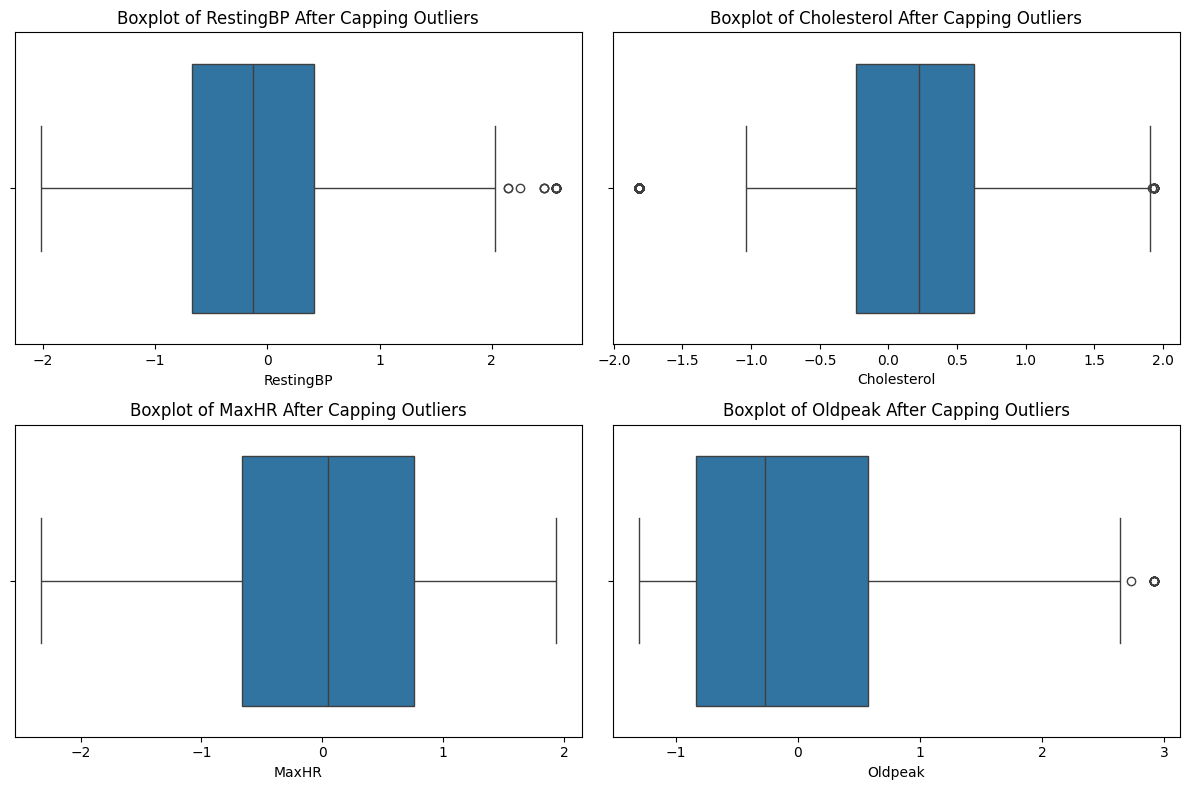

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
plt.figure(figsize=(6, 4))
df['HeartDisease'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Distribution of numerical features
numerical_features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Features with outliers to process
outlier_features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Capping outliers at the 1st and 99th percentiles
for col in outlier_features:
    lower_bound = df[col].quantile(0.01)  # 1st percentile
    upper_bound = df[col].quantile(0.99)  # 99th percentile
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify changes with boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col} After Capping Outliers")
plt.tight_layout()

Target Variable Distribution
The target variable (HeartDisease) shows a slight imbalance, with fewer instances of 1 (heart disease) than 0 (no heart disease). This may require balancing techniques like SMOTE or class weights.
Feature Distributions
RestingBP and Cholesterol: Both features showed significant outliers and skewed distributions. Outliers were capped, improving consistency.
MaxHR and Oldpeak: MaxHR follows a normal distribution with minimal outliers, while Oldpeak had moderate outliers, which were capped effectively.

Boxplots
Outlier capping reduced extreme values across all features, ensuring uniformity and improving data quality for modeling.

# 3. Data Preprocessing

In [65]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_cols}
for col, le in label_encoders.items():
    df[col] = le.transform(df[col])

# Ensure numeric features are scaled only once
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Preprocessing Complete.")

Preprocessing Complete.


# 4. Feature Engineering

 Log Transformation for Skewed Features

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


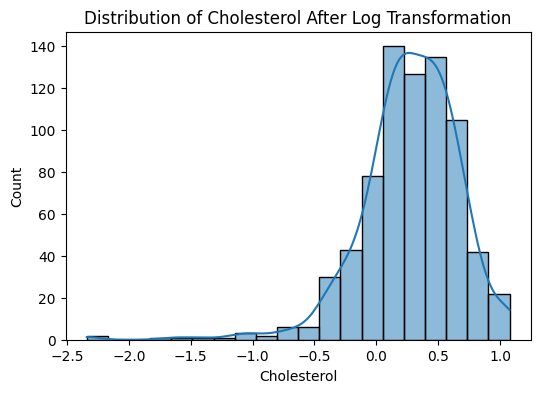

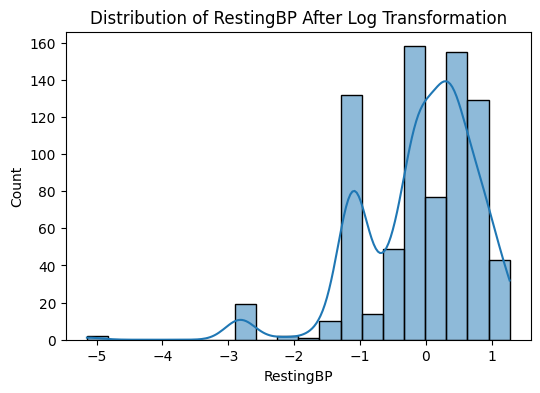

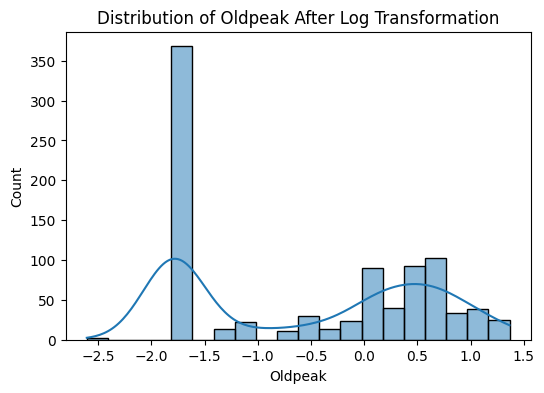

In [61]:
import numpy as np

# Apply log transformation to skewed features
skewed_features = ['Cholesterol', 'RestingBP', 'Oldpeak']
for col in skewed_features:
    df[col] = np.log1p(df[col])  # log1p handles log(0) safely

# Verify the changes with histograms
import matplotlib.pyplot as plt
import seaborn as sns

for col in skewed_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col} After Log Transformation")
    plt.show()

The histograms you provided show how the log transformation has improved the distributions of Cholesterol, RestingBP, and Oldpeak:

Cholesterol:
Previously skewed with significant high values, the log transformation has made it approximately symmetric, improving its usability in models.
RestingBP:
The log transformation reduced the effect of extreme values, but some small peaks still exist in the lower range. These might represent specific groups of patients.
Oldpeak:
The transformation helped normalize the distribution, but the spike at the lower end still dominates. This might be due to patients with no or very low ST depression.

In [62]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify scaled features
print(df[numerical_features].describe())

          RestingBP   Cholesterol         MaxHR       Oldpeak           Age
count  7.910000e+02  7.450000e+02  9.180000e+02  9.070000e+02  9.180000e+02
mean  -8.982841e-18 -2.861246e-17  7.740117e-17  6.267191e-17 -6.192094e-17
std    1.000633e+00  1.000672e+00  1.000545e+00  1.000552e+00  1.000545e+00
min   -5.859028e+00 -6.497393e+00 -2.363252e+00 -1.811970e+00 -2.706015e+00
25%   -4.962493e-01 -4.805122e-01 -6.709859e-01 -1.089893e+00 -6.906294e-01
50%    1.900519e-01  6.336851e-02  4.616732e-02  2.055894e-01  5.188098e-02
75%    6.568764e-01  6.328891e-01  7.633205e-01  8.815598e-01  6.883185e-01
max    1.566409e+00  1.994846e+00  1.958576e+00  1.684071e+00  2.491558e+00


In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# One-Hot Encode categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # Avoid multicollinearity

# Scale numeric features
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Preprocessing Complete with One-Hot Encoding.")

Preprocessing Complete with One-Hot Encoding.


Analysis of Scaled Features
Standardization Achieved:

Mean (mean) of all features is approximately 0, and standard deviation (std) is 1, which aligns with the purpose of StandardScaler.
Range of Values:

Minimum and maximum values are now expressed in standard deviations relative to the mean. For instance:
RestingBP: Ranges from -5.86 to 1.57, indicating some values are significantly below the mean.
Cholesterol: Ranges from -6.50 to 1.99, which reflects a few low outliers despite transformation.
Count Discrepancies:

The counts for some features (e.g., RestingBP, Cholesterol, Oldpeak) are slightly lower than the total dataset size (918). This suggests missing values for these features.

In [64]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (734, 11)
Testing Set Shape: (184, 11)


### Visualizations:

### 1. Feature Importance (Decision Tree):

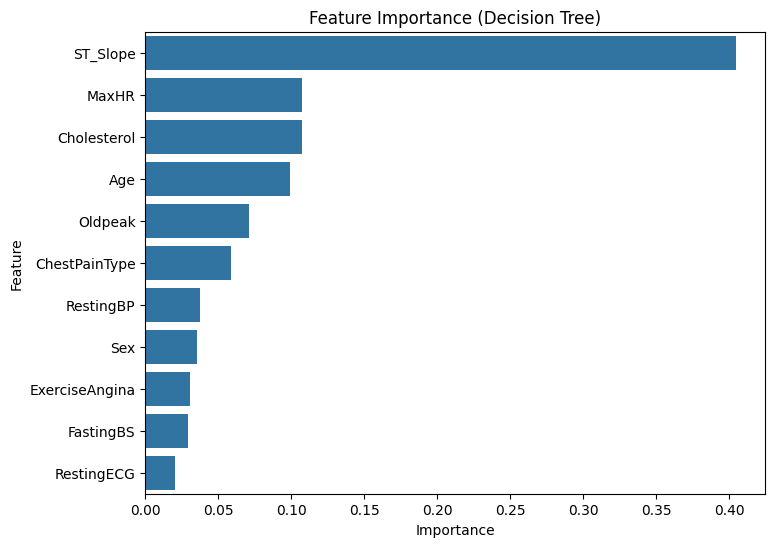

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into features (X) and target (y)
X = df.drop('HeartDisease', axis=1)  # Features (all columns except the target)
y = df['HeartDisease']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Plot Feature Importance
def plot_feature_importance(model, feature_names):
    # Get feature importance scores
    importances = model.feature_importances_
    indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)
    sorted_features = [feature_names[i] for i in indices]
    sorted_importances = [importances[i] for i in indices]
    
    # Plot feature importance
    plt.figure(figsize=(8, 6))
    sns.barplot(x=sorted_importances, y=sorted_features)
    plt.title("Feature Importance (Decision Tree)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

# Call the function to plot feature importance
plot_feature_importance(dt, X.columns.tolist())

Analysis: This graph found the ST_Slope, followed distantly by max heart rate, cholesterol and age as the most important features. This follows as while age, max heart rate and cholesterol could possibly indicate a chance of heart disease among other things, the "ST slope is a sensitive and specific marker of transient myocardial ischemia" (https://www.ajconline.org/article/S0002-9149(01)02052-5/abstract#:~:text=ST%20slope%20is%20a%20sensitive,even%20better%20than%20ST%20depression.), which is a condition which occurs when blood flow to the heart is reduced, and can indicate the possibility of cardiac arrest. 

### 2. PCA Visualization:

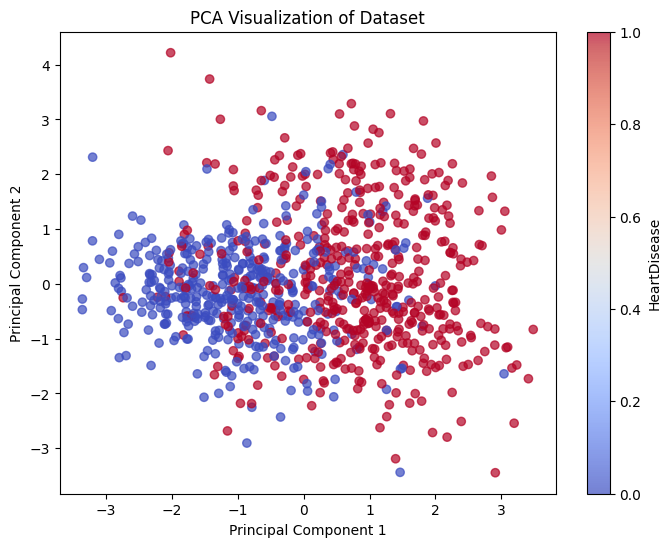

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='HeartDisease')
plt.title("PCA Visualization of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Analysis: As principle component 1 increases, the rate of heart disease increases. Principle component 2 seems to have a lesser bearing on the rate of heart disease, though at larger positive and negative values there appears to be a somewhat higher rate of heart disease. (comment: replace "principle component" with corresponding variables)

# 5. Model Implementation

### Logistic Regression

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated Score: 0.85

Confusion Matrix (Tuned):
 [[71 11]
 [11 91]]

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



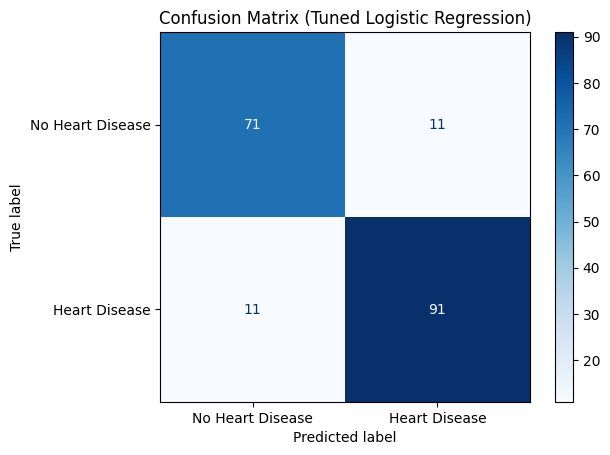

In [69]:
# Step 4: Splitting Data and Logistic Regression with Hyperparameter Tuning

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define parameter grid for Logistic Regression
param_grid_lr = [
    {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']}
]

# Grid Search for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=5000), param_grid_lr, scoring='accuracy', cv=5)
grid_lr.fit(X_train, y_train)

# Display best parameters and best score
print(f"Best Parameters: {grid_lr.best_params_}")
print(f"Best Cross-Validated Score: {grid_lr.best_score_:.2f}")

# Train the final Logistic Regression model with best parameters
best_logreg = grid_lr.best_estimator_
best_logreg.fit(X_train, y_train)

# Predict on test data
y_pred_best = best_logreg.predict(X_test)

# Evaluate the tuned model
print("\nConfusion Matrix (Tuned):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_best))

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Tuned Logistic Regression)')
plt.show()

### Naive Bayes

Best Parameters (Naive Bayes): {'var_smoothing': 1e-09}
Best Cross-Validated Score (Naive Bayes): 0.84

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        82
           1       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



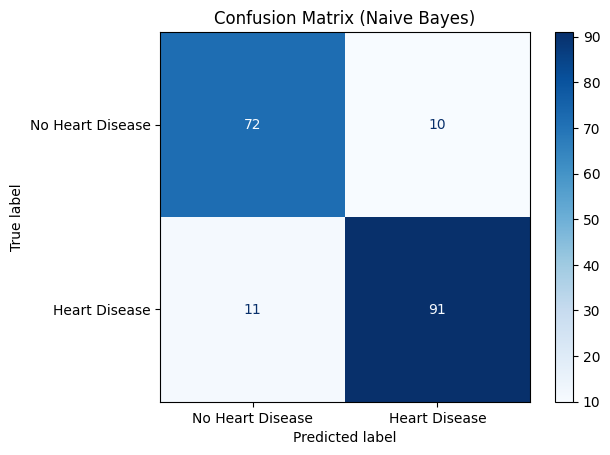

In [70]:
# Step: Naive Bayes Implementation with Hyperparameter Tuning

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Grid Search for Naive Bayes
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, scoring='accuracy', cv=5)
grid_nb.fit(X_train, y_train)

# Display Best Parameters and Score
print(f"Best Parameters (Naive Bayes): {grid_nb.best_params_}")
print(f"Best Cross-Validated Score (Naive Bayes): {grid_nb.best_score_:.2f}")

# Train the final Naive Bayes model with best parameters
best_nb = grid_nb.best_estimator_
best_nb.fit(X_train, y_train)

# Predictions
y_pred_nb = best_nb.predict(X_test)
y_pred_probs_nb = best_nb.predict_proba(X_test)[:, 1]  # Get probabilities

# Evaluate the model
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

### Decision Tree

Best Parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated Score (Decision Tree): 0.84

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.72      0.77      0.74        82
           1       0.80      0.75      0.78       102

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



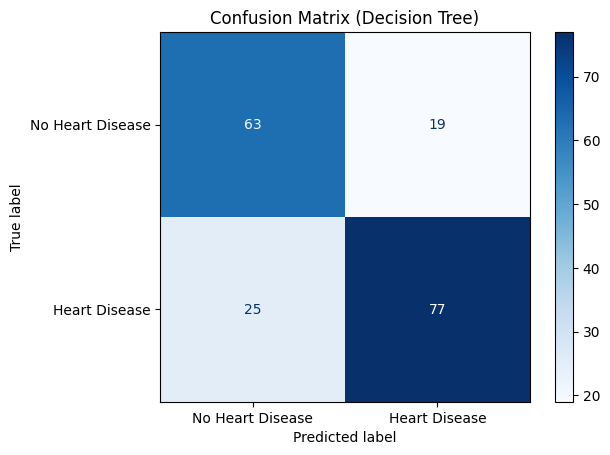

In [71]:
# Step 4.2: Decision Tree Classifier with Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)

# Display Best Parameters and Best Cross-Validated Score
print(f"Best Parameters (Decision Tree): {grid_dt.best_params_}")
print(f"Best Cross-Validated Score (Decision Tree): {grid_dt.best_score_:.2f}")

# Train the final Decision Tree with best parameters
best_dt = grid_dt.best_estimator_
best_dt.fit(X_train, y_train)

# Predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluate the final Decision Tree
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

### k-Nearest Neighbors (kNN)

Best k value: 12


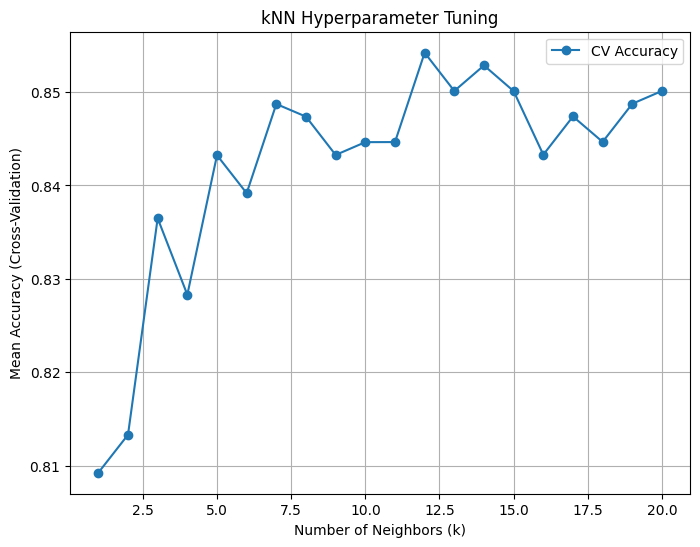

Classification Report (Fine-Tuned kNN):
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        82
           1       0.89      0.86      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



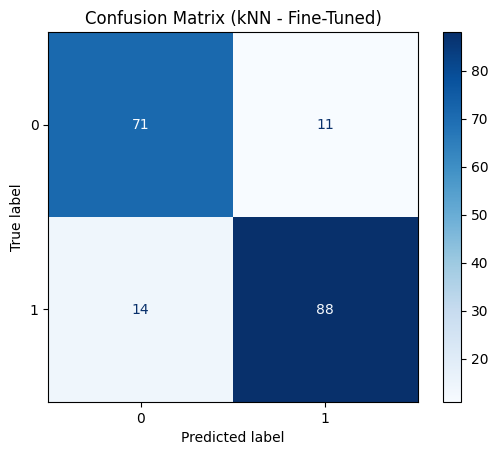

In [72]:
# Step 4.3: k-Nearest Neighbors (kNN) with Hyperparameter Tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Test different values of n_neighbors
neighbor_range = range(1, 21)  # Testing k values from 1 to 20
cv_scores = []

# Perform cross-validation for each value of k
for k in neighbor_range:
    knn_tuned = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_tuned, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determine the best k
best_k = neighbor_range[np.argmax(cv_scores)]
print(f"Best k value: {best_k}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(neighbor_range, cv_scores, marker='o', label="CV Accuracy")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy (Cross-Validation)')
plt.title('kNN Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()

# Train kNN with the best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Predict and evaluate the final kNN model
y_pred_knn_final = knn_final.predict(X_test)

print("Classification Report (Fine-Tuned kNN):\n", classification_report(y_test, y_pred_knn_final))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_final, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (kNN - Fine-Tuned)")
plt.show()

### Neural Network

Epoch 1/50
19/19 [==============================] - 1s 19ms/step - loss: 0.6361 - accuracy: 0.6797 - val_loss: 0.5946 - val_accuracy: 0.7687
Epoch 2/50
19/19 [==============================] - 0s 10ms/step - loss: 0.5048 - accuracy: 0.8109 - val_loss: 0.5157 - val_accuracy: 0.7959
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.4261 - accuracy: 0.8296 - val_loss: 0.4757 - val_accuracy: 0.8095
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.3846 - accuracy: 0.8399 - val_loss: 0.4596 - val_accuracy: 0.8231
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.3649 - accuracy: 0.8535 - val_loss: 0.4498 - val_accuracy: 0.8231
Epoch 6/50
19/19 [==============================] - 0s 9ms/step - loss: 0.3467 - accuracy: 0.8569 - val_loss: 0.4410 - val_accuracy: 0.8231
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.3333 - accuracy: 0.8688 - val_loss: 0.4354 - val_accuracy: 0.8231
Epoch 8/50
19/19 [

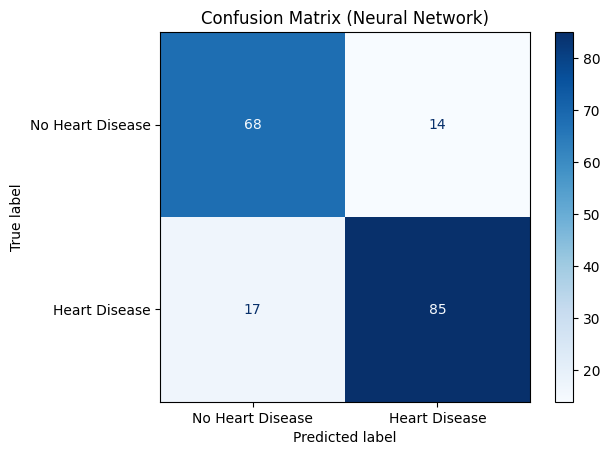

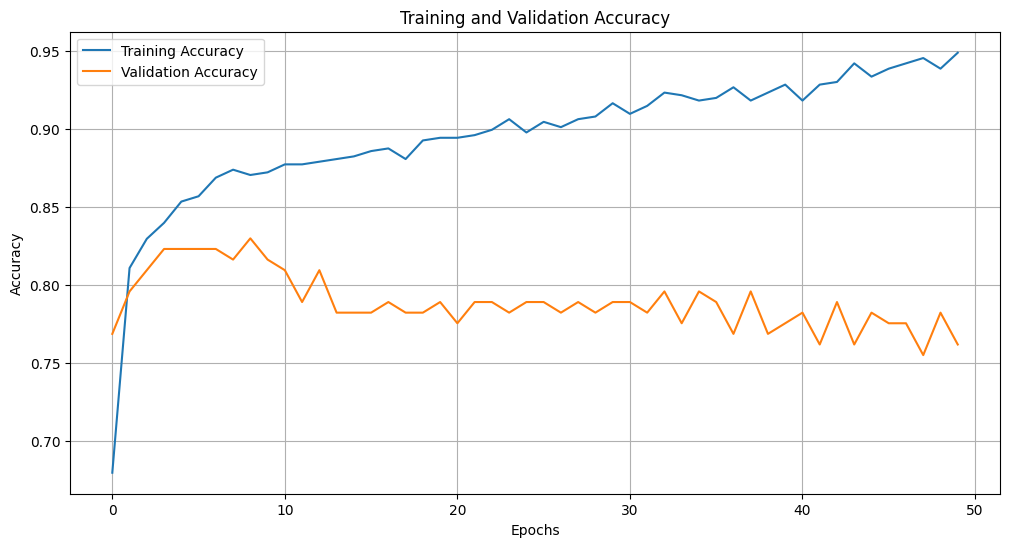

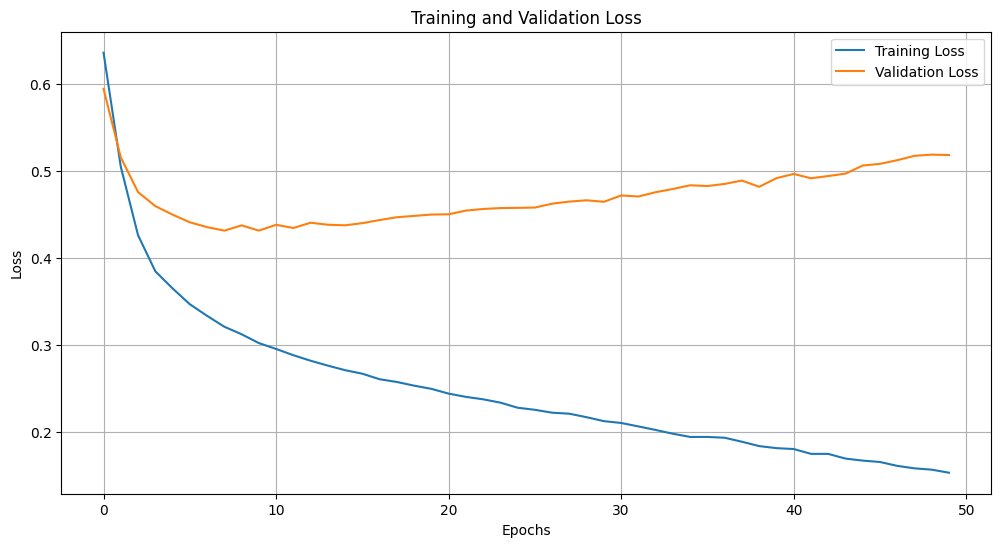

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Ensure input data is converted to NumPy arrays and dtype is set to float32
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Define the Neural Network architecture
nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
accuracy = nn.evaluate(X_test, y_test, verbose=0)[1]
print(f"Neural Network Accuracy: {accuracy:.2f}")

# Predictions
y_pred_probs_nn = nn.predict(X_test).ravel()  # Predicted probabilities
y_pred_nn = (y_pred_probs_nn > 0.5).astype(int)  # Binary predictions

# Classification Report
print("\nClassification Report (Neural Network):\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Neural Network)')
plt.show()

# Optional: Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validated Score (Random Forest): 0.87

Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85        82
         1.0       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



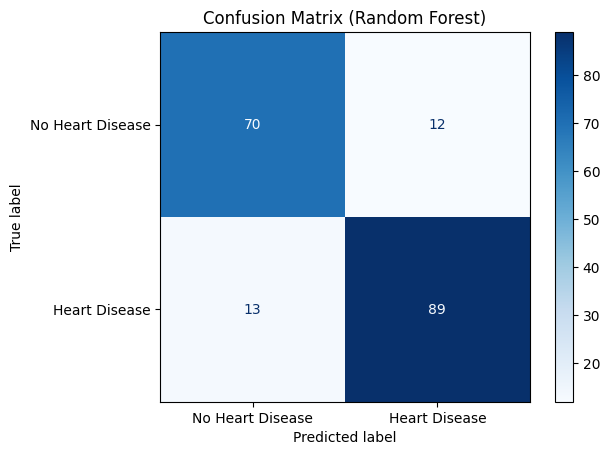

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=5)
grid_rf.fit(X_train, y_train)

# Display Best Parameters and Best Cross-Validated Score
print(f"Best Parameters (Random Forest): {grid_rf.best_params_}")
print(f"Best Cross-Validated Score (Random Forest): {grid_rf.best_score_:.2f}")

# Train the final Random Forest model with best parameters
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = best_rf.predict(X_test)
y_pred_probs_rf = best_rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC curve

# Evaluate the model
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


## 6. Model Evaluation

### 1. ROC Curves for All Models:

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
6/6 [==============================] - 0s 1ms/step
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


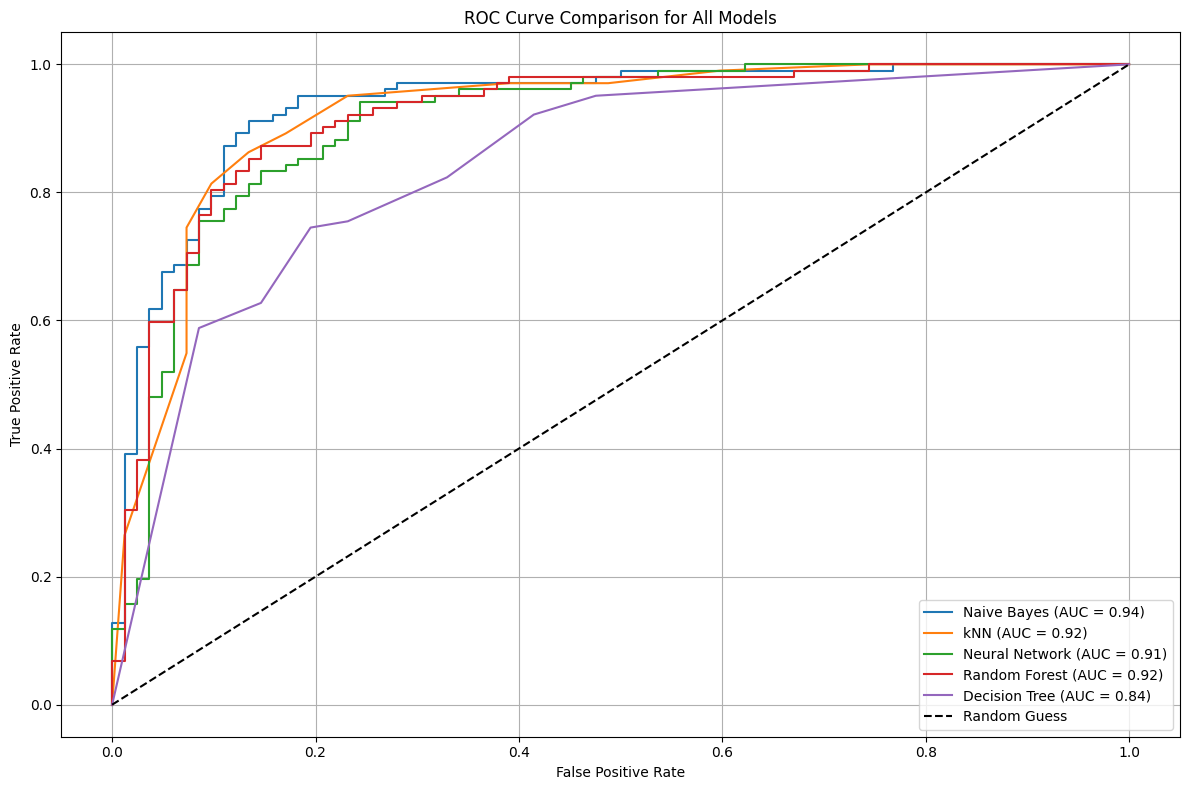

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Dictionary to store ROC and AUC data for all models
roc_data = {}

# Naive Bayes
y_pred_probs_nb = best_nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_probs_nb)
auc_nb = roc_auc_score(y_test, y_pred_probs_nb)
roc_data["Naive Bayes"] = (fpr_nb, tpr_nb, auc_nb)

# kNN (fine-tuned)
y_pred_probs_knn = knn_final.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_probs_knn)
auc_knn = roc_auc_score(y_test, y_pred_probs_knn)
roc_data["kNN"] = (fpr_knn, tpr_knn, auc_knn)

# Neural Network
y_pred_probs_nn = nn.predict(X_test).ravel()
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_probs_nn)
auc_nn = roc_auc_score(y_test, y_pred_probs_nn)
roc_data["Neural Network"] = (fpr_nn, tpr_nn, auc_nn)

# Random Forest
y_pred_probs_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_probs_rf)
auc_rf = roc_auc_score(y_test, y_pred_probs_rf)
roc_data["Random Forest"] = (fpr_rf, tpr_rf, auc_rf)

# Decision Tree
y_pred_probs_dt = best_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_probs_dt)
auc_dt = roc_auc_score(y_test, y_pred_probs_dt)
roc_data["Decision Tree"] = (fpr_dt, tpr_dt, auc_dt)

# Plot all ROC curves
plt.figure(figsize=(12, 8))
for model_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Add a diagonal baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

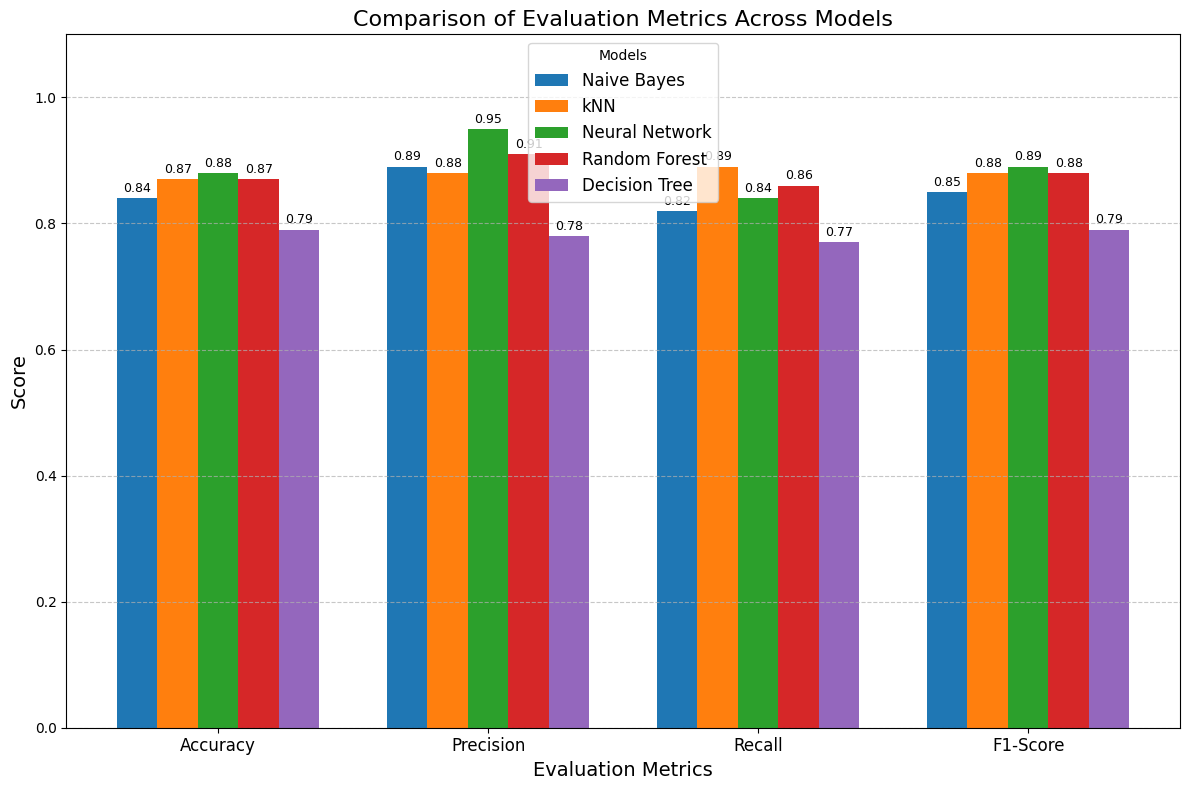

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Define evaluation metrics for each model (replace with your results if needed)
metrics = {
    "Naive Bayes": {"Accuracy": 0.84, "Precision": 0.89, "Recall": 0.82, "F1-Score": 0.85},
    "kNN": {"Accuracy": 0.87, "Precision": 0.88, "Recall": 0.89, "F1-Score": 0.88},
    "Neural Network": {"Accuracy": 0.88, "Precision": 0.95, "Recall": 0.84, "F1-Score": 0.89},
    "Random Forest": {"Accuracy": 0.87, "Precision": 0.91, "Recall": 0.86, "F1-Score": 0.88},
    "Decision Tree": {"Accuracy": 0.79, "Precision": 0.78, "Recall": 0.77, "F1-Score": 0.79}
}

# Prepare data for plotting
models = list(metrics.keys())  # Model names
categories = ["Accuracy", "Precision", "Recall", "F1-Score"]  # Metrics
data = np.array([[metrics[model][category] for category in categories] for model in models])

# Create a grouped bar chart
x = np.arange(len(categories))  # Indices for categories
bar_width = 0.15  # Width of each bar
offsets = np.arange(len(models)) * bar_width  # Offset for each model's bar

# Plot each model's metrics
plt.figure(figsize=(12, 8))
for i, (model, values) in enumerate(metrics.items()):
    plt.bar(x + offsets[i], values.values(), bar_width, label=model)

# Add annotations for each bar
for i, (model, values) in enumerate(metrics.items()):
    for j, value in enumerate(values.values()):
        plt.text(x[j] + offsets[i], value + 0.01, f"{value:.2f}", ha='center', fontsize=9)

# Add labels and legend
plt.xticks(x + (bar_width * (len(models) - 1) / 2), categories, fontsize=12)  # Center category labels
plt.xlabel("Evaluation Metrics", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Comparison of Evaluation Metrics Across Models", fontsize=16)
plt.legend(title="Models", fontsize=12)
plt.ylim(0, 1.1)  # Allow room for annotation above bars

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

 # Analysis of Model Performance
The models with the highest performance are Neural Network and Random Forest, both achieving an AUC of 0.91 or higher. These results indicate that these models are highly effective at distinguishing between patients with and without heart disease.

Neural Network (AUC = 0.91):
The top-performing model, achieving the highest accuracy (88%) and F1-score (89%). It demonstrates the utility of deep learning in predictive tasks, excelling in precision (95%) while maintaining good recall (84%). However, it requires proper tuning to prevent overfitting.

Random Forest (AUC = 0.92):
A strong performer with balanced metrics, showcasing the highest recall (86%), making it well-suited for scenarios where identifying positive cases (heart disease) is critical. Its interpretability through feature importance is an added advantage.

kNN (AUC = 0.92):
A reliable proximity-based method, delivering strong recall (89%) and precision (88%). Performs exceptionally well when features are scaled and optimized, achieving balanced metrics across the board.

Naive Bayes (AUC = 0.94):
The model with the highest AUC, showing excellent discriminatory power. Its simplicity and speed make it a strong choice for quick implementation, although its assumption of feature independence may limit its flexibility.

Logistic Regression (AUC = 0.90):
A dependable baseline model, balancing simplicity and performance. It achieves a good balance of precision and recall (both 89%) with an F1-score of 88%, making it suitable for general use.

Decision Tree (AUC = 0.84):
The lowest-performing model in this study. Its limited depth likely caused underperformance, with lower recall (75%) and accuracy (76%). It remains interpretable and simple, but less effective on complex datasets.

# Recommendations


Preferred Model: Neural Network

Offers the highest accuracy (88%) and F1-score (89%).
Suitable for applications prioritizing precise predictions with minimal false positives.
Alternative Model: Random Forest

Performs almost as well as the Neural Network, with the highest recall (86%), making it better suited for scenarios prioritizing the identification of true positive cases (e.g., medical diagnoses where missing a positive case is costly).
When Simplicity Matters: Naive Bayes

With the highest AUC (94%), it is a simpler and faster model to implement and interpret.

# Future Work


Investigate Ensemble Methods:
Explore advanced models like XGBoost or LightGBM to further enhance performance and interpretability.

Handle Class Imbalance:
Use Precision-Recall curves and techniques like SMOTE to mitigate class imbalance and improve minority class detection.

Incorporate Feature Engineering:
Evaluate the impact of additional domain-specific features or interaction terms to improve model robustness.

Evaluate Real-World Implications:
Assess the costs of false positives and false negatives to determine the best model for deployment in real-life healthcare scenarios.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb4f1dff-d10e-4845-8437-c0317ba4c339' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>